In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from gensim.models import KeyedVectors
from numpy import linalg as LA
from sklearn.manifold import TSNE
from nltk.tokenize import RegexpTokenizer

%matplotlib inline

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
wordVectors = KeyedVectors.load_word2vec_format("models/wiki-news.vec", binary=False)

In [53]:
def cosineDist(u, v):
    return np.dot(u, v)/(LA.norm(u)*LA.norm(v))
def euclideanDist(u, v):
    return LA.norm(u-v)
def sentenceVector(sentence):
    words = tokenizer.tokenize(sentence)
    sentenceVector = np.zeros([wordVectors.vector_size], dtype='float32')
    count = 0
    for word in words:
        wordVector = wordVectors.get_vector(word)
        sentenceVector += wordVector/LA.norm(wordVector)
        count += 1
        
    if count == 0:
        return None
    sentenceVector /= count
    return sentenceVector

In [14]:
sentences = [
    "Delete file",
    "Remove file",
    "Erase file",
    "Create file",
    "Create folder",
    "Move file",
    "Copy file",
    "What is the time",
    "Time please",
    "What is the date",
    "List directory",
    "List files and folders",
    "Whats in this directory",
    "Change directory",
    "Search the web",
    "Locate a file",
    "Search for file"
]

In [58]:
sentenceVectors = []
for s in sentences:
    sentenceVectors.append(sentenceVector(s))

In [61]:
corrMat = np.ndarray((len(sentenceVectors), len(sentenceVectors)), dtype='float32')
for i, u in enumerate(sentenceVectors):
    for j, v in enumerate(sentenceVectors):
        corrMat[i][j] = cosineDist(sentenceVectors[i], sentenceVectors[j])

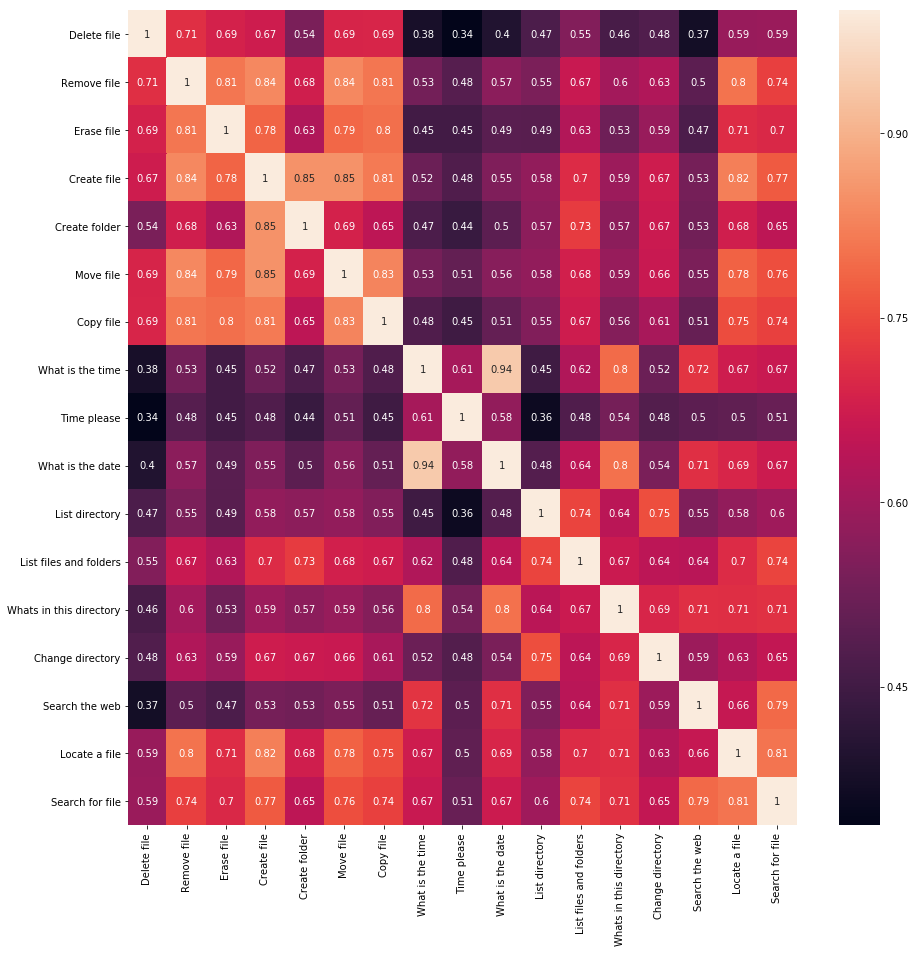

In [62]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMat, ax=ax, annot=True, xticklabels=sentences, yticklabels=sentences)
fig.savefig("heatmap.png", bbox_inches='tight')

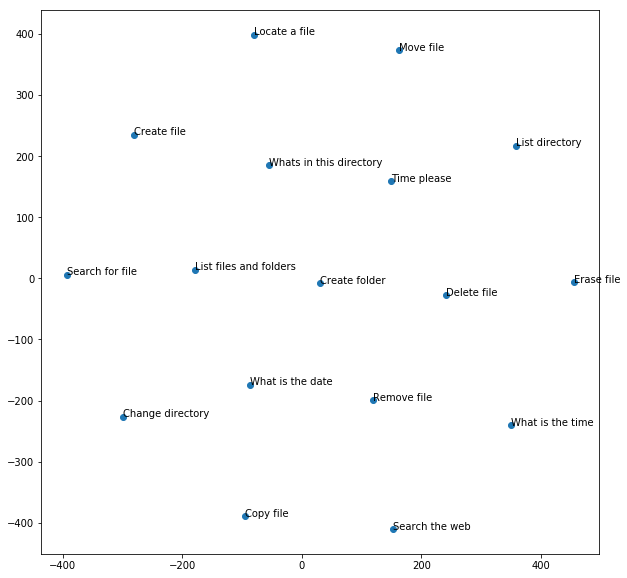

In [65]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=10000)
two_d_embeddings = tsne.fit_transform(sentenceVectors)

fig = plt.figure(figsize=(10,10))  # in inches
ax = fig.add_subplot(1,1,1)
xs = []
ys = []
for i, embedding in enumerate(two_d_embeddings):
    x, y = embedding
    xs.append(x)
    ys.append(y)
    ax.annotate(sentences[i], (x, y))
plt.scatter(xs, ys)
fig.savefig("tsne.png")
plt.show()